<a href="https://colab.research.google.com/github/paulopetrillo/citacoes/blob/master/hackton_Evol_skills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carrega a base de dados.

In [1]:
# Importa as bibliotecas.
import pandas as pd
import numpy as np

In [3]:
BaseDados = pd.read_csv("/Customer-Churn-Records.csv", sep = ",")
BaseDados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
BaseDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
BaseDados.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [6]:
# porcentagem de evadidos
percentual_churn = BaseDados['Exited'].value_counts(normalize=True) * 100
percentual_churn

,proportion
Exited,
0,79.62
1,20.38


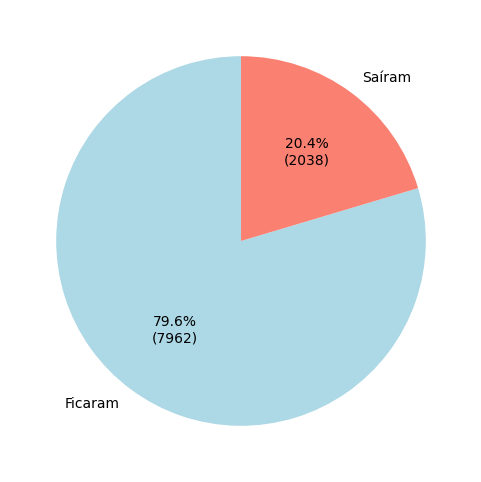

In [7]:
# import pandas as pd
import matplotlib.pyplot as plt
# import numpy as np

contagem = BaseDados['Exited'].value_counts()

labels = ['Ficaram', 'Saíram']
valores = [contagem[0], contagem[1]]

def formatar_autopct(pct, all_vals):
    valor_absoluto = int(round(pct/100. * sum(all_vals)))
    return f"{pct:.1f}%\n({valor_absoluto})"

plt.figure(figsize=(6, 6))
plt.pie(valores, labels=labels, autopct=lambda pct: formatar_autopct(pct, valores),
        startangle=90, colors=['lightblue', 'salmon'])
# plt.title('Distribuição de Clientes')
plt.show()

# # Salvando no formato EPS
# plt.savefig("Dist_Cli_Pie.png", format="png")

# # Para baixar o arquivo no Colab
# from google.colab import files
# files.download("Dist_Cli_Pie.png")

In [8]:
# # Calculando a correlação entre as duas colunas
# correlacao = BaseDados['Exited'].corr(BaseDados['Complain'])

# print(f"A correlação entre 'Exited' e 'Complain' é: {correlacao}")

# Verifica os valores de PComplain para definir a quantidade de intervalos no histograma.
BaseDados['CreditScore'].sort_values().unique()

array([350, 351, 358, 359, 363, 365, 367, 373, 376, 382, 383, 386, 395,
       399, 401, 404, 405, 407, 408, 410, 411, 412, 413, 414, 415, 416,
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,
       495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507,
       508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520,
       521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533,
       534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546,
       547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559,
       560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 57

In [11]:
# # Verificando se a distribuição é Normal
# plt.figure(figsize=(10,7), dpi= 80)
# #sns.histplot(BaseDados['CreditScore'], bins=19, kde=True)
# sns.histplot(BaseDados['CreditScore'], kde=True)
# plt.show()

NameError: name 'sns' is not defined

<Figure size 800x560 with 0 Axes>

In [10]:
# Importa biblioteca estatística.
import scipy.stats as stats
# Performing normaltest
from scipy.stats import normaltest
import pylab as p
# teste de normaliadade para verificar aplicação de testes paramétricos.
alpha = 0.05
k2, p = normaltest(BaseDados['CreditScore'])
#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal
if p < alpha:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")
print('Valoir de p é ', p)
# p-valor: Pode também ser citado como valor-p. É a probabilidade de se obter um
# efeito tão extremo quanto o que está ocorrendo em nossos dados, assumindo que a
# hipótese nula é verdadeira. (Qual a probabilidade da distribuição que observamos
# naquele histograma ocorrer? Este é o p-valor).

# alpha: É o nível de significância, isto é, a probabilidade de rejeitarmos a
# hipótese nula quando ela é verdadeira. (Neste caso, a probabilidade de concluirmos
# que os dados não seguem a distribuição normal, quando na verdade seguem).

# k2: Este valor é, na verdade, a soma de dois termos elevados ao quadrado: s² + k².
# Sendo s o valor z obtido através do teste de assimetria (skewtest) e k é o valor
# da estatística z obtido pelo teste de curtose.

A Hipótese Nula pode ser rejeitada
Valoir de p é  1.434445056038405e-29


In [79]:
# # Conjunto de dados discretos
# dados_PAM = DataFrame_Geral['poder_ataque_time_mandante']

# # Realiza o teste de Kolmogorov-Smirnov
# ks_statistic, p_value = stats.kstest(dados_PAM, 'norm')

# # Imprime o resultado do teste
# print('ks_statistic:', ks_statistic)
# print('p_value:', p_value)

# O teste de normalidade de Kolmogorov-Smirnov é um teste de hipóteses que testa
# a hipótese nula de que os dados seguem uma distribuição normal.
# O p-valor do teste é a probabilidade de obter uma ks_statistic tão extrema ou
# mais extrema do que a observada, assumindo que a hipótese nula é verdadeira.

# Um p-valor menor que 0,05 indica que há uma diferença significativa entre a CDF
# dos dados observados e a CDF de uma distribuição normal. Nesse caso, a hipótese
# nula é rejeitada e conclui-se que os dados não seguem uma distribuição normal.

# Portanto, a ks_statistic é um indicador da diferença entre a distribuição de
# frequência dos dados observados e a distribuição de frequência esperada de uma
# distribuição normal.
# Um valor alto de ks_statistic indica que há uma diferença significativa entre as
# duas distribuições.

In [80]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 6))
# product_churn = BaseDados.groupby(['NumOfProducts', 'Exited']).size().unstack()
# product_churn_percent = product_churn.div(product_churn.sum(axis=1), axis=0) * 100
# ax = product_churn_percent.plot(kind='line', figsize=(12, 6), color=['#66b3ff', '#ff9999'])
# plt.title('Taxa de Churn por Número de Produtos', fontsize=16)
# plt.xlabel('Número de Produtos')
# plt.ylabel('Porcentagem (%)')
# plt.xticks(rotation=0)
# plt.legend(['Clientes Atuais', 'Clientes Evadidos'])
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.1f%%')
# plt.tight_layout()
# plt.show()

In [ ]:
# clientes_evadidos = BaseDados[BaseDados['Exited'] == 1]
# product_counts = clientes_evadidos['NumOfProducts'].value_counts()
# plt.figure(figsize=(8, 8))
# plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'])
# plt.title('Distribuição de Clientes Evadidos por Número de Produtos', fontsize=16)
# plt.tight_layout()
# plt.savefig('product_churn_pizza.png')
# plt.show()

In [ ]:
# # Obtendo os nomes das variáveis selecionadas
# selected_features = X.columns[selector.get_support()]

# # Imprimindo as variáveis selecionadas
# print(f"As {k} variáveis mais relevantes para explicar 'Exited' são:")
# print(selected_features)

# # Para visualizar a importância de cada feature, você pode usar o seguinte:
# feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': selector.scores})
# feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# print("\nImportância das features:")
# feature_importances

In [12]:
import matplotlib.pyplot as plt
# import seaborn as sns

# # Verifica os valores de Poder de ataque visitante para definir a quantidade de intervalos no histograma.
# BaseDados['CreditScore'].sort_values().unique()
# Correlação de Pearson

# BaseDados_corr = BaseDados[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Complain',
# 'Point Earned', 'IsActiveMember', 'Exited']]

BaseDadosCorr = BaseDados[['Exited', 'CreditScore', 'Age', 'Tenure', 'Balance',
                            'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                            'EstimatedSalary', 'Complain', 'Satisfaction Score',
                            'Point Earned']]

resul = BaseDadosCorr.corr(method='spearman')
resul

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned
Exited,1.000000,-0.022948,0.324012,-0.013628,0.111069,-0.125026,-0.006976,-0.156356,0.012472,0.995693,-0.005905,-0.004406
CreditScore,-0.022948,1.000000,-0.007974,0.001133,0.005687,0.012568,-0.003802,0.024262,0.001237,-0.023308,-0.013236,0.000873
Age,0.324012,-0.007974,1.000000,-0.010405,0.033304,-0.058566,-0.015278,0.039839,-0.002431,0.322204,0.002347,-0.001227
Tenure,-0.013628,0.001133,-0.010405,1.000000,-0.009513,0.012908,0.022354,-0.028673,0.007778,-0.013037,0.008600,-0.010360
Balance,0.111069,0.005687,0.033304,-0.009513,1.000000,-0.316627,-0.009835,-0.011497,0.011778,0.111597,-0.005936,0.013018
NumOfProducts,-0.125026,0.012568,-0.058566,0.012908,-0.316627,1.000000,0.003859,0.016292,0.012570,-0.123494,-0.012177,-0.014269
HasCrCard,-0.006976,-0.003802,-0.015278,0.022354,-0.009835,0.003859,1.000000,-0.011866,-0.010041,-0.007095,-0.000211,-0.011168
IsActiveMember,-0.156356,0.024262,0.039839,-0.028673,-0.011497,0.016292,-0.011866,1.000000,-0.011469,-0.154741,0.010232,-0.005011
EstimatedSalary,0.012472,0.001237,-0.002431,0.007778,0.011778,0.012570,-0.010041,-0.011469,1.000000,0.012476,-0.013744,-0.001663
Complain,0.995693,-0.023308,0.322204,-0.013037,0.111597,-0.123494,-0.007095,-0.154741,0.012476,1.000000,-0.004855,-0.002736


In [13]:
# Transformando resul em um DataFrame
df_Exited = pd.DataFrame(resul)
print(df_Exited['Exited'])

Exited                1.000000
CreditScore          -0.022948
Age                   0.324012
Tenure               -0.013628
Balance               0.111069
NumOfProducts        -0.125026
HasCrCard            -0.006976
IsActiveMember       -0.156356
EstimatedSalary       0.012472
Complain              0.995693
Satisfaction Score   -0.005905
Point Earned         -0.004406
Name: Exited, dtype: float64


                    Corl.Exited  Intensidade  Sentido
Exited                 1.000000  total        direta
CreditScore           -0.022948  desprezível  inversa
Age                    0.324012  média        direta
Tenure                -0.013628  desprezível  inversa
Balance                0.111069  fraca        direta
NumOfProducts         -0.125026  fraca        inversa
HasCrCard             -0.006976  desprezível  inversa
IsActiveMember        -0.156356  fraca        inversa
EstimatedSalary        0.012472  desprezível  direta
Complain               0.995693  muito forte  direta
Satisfaction Score    -0.005905  desprezível  inversa
Point Earned          -0.004406  desprezível  inversa

In [15]:

# Criando os intervalos de idade e seus rótulos
bins = [18, 30, 40, 50, 60, float('inf')]
labels = ["18-30", "31-40", "41-50", "51-60", "60+"]

# Criando a nova coluna de faixa etária
BaseDados["Faixa_Etaria"] = pd.cut(BaseDados["Age"], bins=bins, labels=labels, right=True)

# Contando o número de Churn por faixa etária
tabela_churn = BaseDados.groupby("Faixa_Etaria")["Exited"].sum().reset_index()

# Exibindo a tabela resultante
print(tabela_churn)

  Faixa_Etaria  Exited
0        18-30     146
1        31-40     539
2        41-50     788
3        51-60     448
4          60+     115


<ipython-input-15-01373a50998e>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela_churn = BaseDados.groupby("Faixa_Etaria")["Exited"].sum().reset_index()


In [20]:
#   Faixa_Etaria  Exited (%)
# 0        18-30    7.502569
# 1        31-40   12.109638
# 2        41-50   33.965517
# 3        51-60   56.210790
# 4          60+   24.784483


import pandas as pd

# Contar quantos clientes saíram (Exited = 1) e quantos não saíram (Exited = 0) para cada IsActiveMember
tabela = BaseDados.groupby("IsActiveMember")["Exited"].value_counts(normalize=True).unstack()

# Renomear as colunas para melhor compreensão
tabela.columns = ["Taxa de Exited = 0", "Taxa de Exited = 1"]

# Exibir a tabela formatada em porcentagem
tabela *= 100
print(tabela)


                Taxa de Exited = 0  Taxa de Exited = 1
IsActiveMember                                        
0                        73.128480           26.871520
1                        85.730926           14.269074


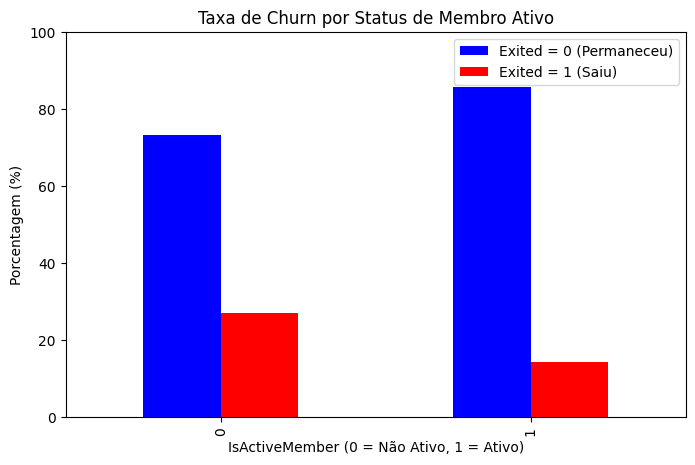

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar a taxa de Exited para cada IsActiveMember
tabela = BaseDados.groupby("IsActiveMember")["Exited"].value_counts(normalize=True).unstack()

# Multiplicar por 100 para transformar em porcentagem
tabela *= 100

# Criando o gráfico de barras
tabela.plot(kind="bar", figsize=(8, 5), color=["blue", "red"])

# Adicionando rótulos e título
plt.xlabel("IsActiveMember (0 = Não Ativo, 1 = Ativo)")
plt.ylabel("Porcentagem (%)")
plt.title("Taxa de Churn por Status de Membro Ativo")
plt.legend(["Exited = 0 (Permaneceu)", "Exited = 1 (Saiu)"])
plt.ylim(0, 100)  # Ajustar a escala para 0-100%

# Exibir o gráfico
plt.show()

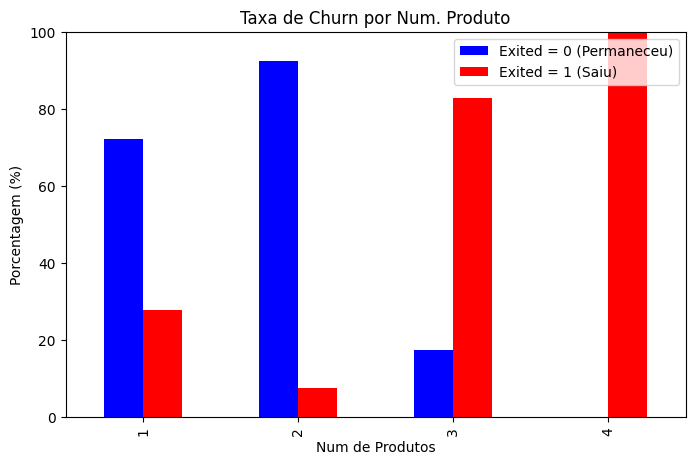

In [23]:
# Contar a taxa de Exited para cada IsActiveMember
tabela = BaseDados.groupby("NumOfProducts")["Exited"].value_counts(normalize=True).unstack()

# Multiplicar por 100 para transformar em porcentagem
tabela *= 100

# Criando o gráfico de barras
tabela.plot(kind="bar", figsize=(8, 5), color=["blue", "red"])

# Adicionando rótulos e título
plt.xlabel("Num de Produtos")
plt.ylabel("Porcentagem (%)")
plt.title("Taxa de Churn por Num. Produto")
plt.legend(["Exited = 0 (Permaneceu)", "Exited = 1 (Saiu)"])
plt.ylim(0, 100)  # Ajustar a escala para 0-100%

# Exibir o gráfico
plt.show()

In [25]:
# # Contar a taxa de Exited para cada IsActiveMember
# tabela = BaseDados.groupby("Balance")["Exited"].value_counts(normalize=True).unstack()

# # Multiplicar por 100 para transformar em porcentagem
# tabela *= 100

# # Criando o gráfico de barras
# tabela.plot(kind="bar", figsize=(8, 5), color=["blue", "red"])

# # Adicionando rótulos e título
# plt.xlabel("Balance")
# plt.ylabel("Porcentagem (%)")
# plt.title("Balance por Num. Produto")
# plt.legend(["Exited = 0 (Permaneceu)", "Exited = 1 (Saiu)"])
# plt.ylim(0, 100)  # Ajustar a escala para 0-100%

# # Exibir o gráfico
# plt.show()

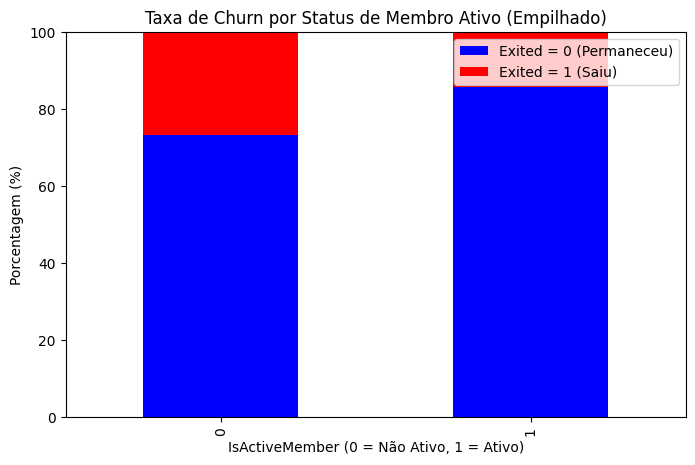

In [22]:
# Contar a taxa de Exited para cada IsActiveMember
tabela = BaseDados.groupby("IsActiveMember")["Exited"].value_counts(normalize=True).unstack()

# Multiplicar por 100 para transformar em porcentagem
tabela *= 100

# Criando o gráfico de colunas empilhadas
fig, ax = plt.subplots(figsize=(8, 5))
tabela.plot(kind="bar", stacked=True, color=["blue", "red"], ax=ax)

# Adicionando rótulos e título
plt.xlabel("IsActiveMember (0 = Não Ativo, 1 = Ativo)")
plt.ylabel("Porcentagem (%)")
plt.title("Taxa de Churn por Status de Membro Ativo (Empilhado)")
plt.legend(["Exited = 0 (Permaneceu)", "Exited = 1 (Saiu)"])
plt.ylim(0, 100)  # Ajustar a escala para 0-100%

# Exibir o gráfico
plt.show()

In [ ]:
#                     Corl.Exited  Intensidade  Sentido
# Exited                 1.000000  total        direta
# CreditScore           -0.022948  desprezível  inversa
# Age                    0.324012  média        direta
# Tenure                -0.013628  desprezível  inversa
# Balance                0.111069  fraca        direta
# NumOfProducts         -0.125026  fraca        inversa
# HasCrCard             -0.006976  desprezível  inversa
# IsActiveMember        -0.156356  fraca        inversa
# EstimatedSalary        0.012472  desprezível  direta
# Complain               0.995693  muito forte  direta
# Satisfaction Score    -0.005905  desprezível  inversa
# Point Earned          -0.004406  desprezível  inversa

Uniformizando a base de dados - Oversampling (técnica = SMOT)

In [84]:
# Biblioteca para balanceamento de carga.
from imblearn.over_sampling import SMOTE

In [85]:

features = BaseDadosCorr.drop('Exited', axis=1)

target = BaseDados['Exited']

# Apply SMOTE to the encoded target variable (features = X)
smote = SMOTE(random_state=42)

# X_resampled, y_resampled = smote.fit_resample(features, y_encoded)
X_resampled, y_resampled = smote.fit_resample(features, target)

In [86]:
# Verificando distribuição das variáveis target após balancemaneto por oversample
x_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.DataFrame(y_resampled)

In [87]:
print(y_resampled.value_counts())
print(x_resampled.value_counts())

Exited
0         7962
1         7962
Name: count, dtype: int64
CreditScore  Age  Tenure  Balance        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Complain  Satisfaction Score  Point Earned
850          81   5       0.000000       2              1          1               44827.470000     0         2                   237             1
350          39   0       109733.200000  2              0          0               123602.110000    1         2                   261             1
             40   0       111098.850000  1              1          1               172321.210000    1         2                   670             1
             51   10      0.000000       1              1          1               125823.790000    1         4                   383             1
850          58   8       156652.130000  1              0          0               25899.210000     1         3                   451             1
                                                      

In [101]:
# Guilherme - Regressão Logistica
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('/Customer-Churn-Records.csv')
#df = pd.get_dummies(df, columns=['Gender', 'Card Type', 'Geography'], drop_first=True)
#df = df.drop(labels=['Surname', 'RowNumber', 'CustomerId', 'Complain'], axis=1)
df = df.drop(labels=['Surname', 'RowNumber', 'CustomerId', 'Gender',
                     'Card Type', 'Geography', 'CreditScore',
                     'Tenure', 'HasCrCard', 'EstimatedSalary',
                     'Satisfaction Score',  'Point Earned'], axis=1)

X = df.drop('Exited', axis=1)
y = df['Exited']

poly = PolynomialFeatures(degree=5, interaction_only=True, include_bias=False)
X_interactions = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_interactions, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=2000)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))

#print(classification_report(y_test, ypred))

#coef = pd.DataFrame(model.coef[0], index=poly.get_feature_names_out(X.columns), columns=['Coeficiente'])

#print(coef)

#coef.to_csv('coefs.csv', index=True)

# [[2352   64]
#  [ 411  173]]

# Com "Complain" - retirar pois esta com Overfitting
# [[2413    3]
#  [   1  583]]

# com a feature: 'Point Earned',
# [[2355   61]
#  [ 415  169]]

[[2413    3]
 [   1  583]]


In [90]:
y_pred = pd.DataFrame(y_pred)
y_pred.value_counts()

,count
0,
0,2771
1,229


Text(0.5, 1.0, 'Modelo: Regresão Logística')

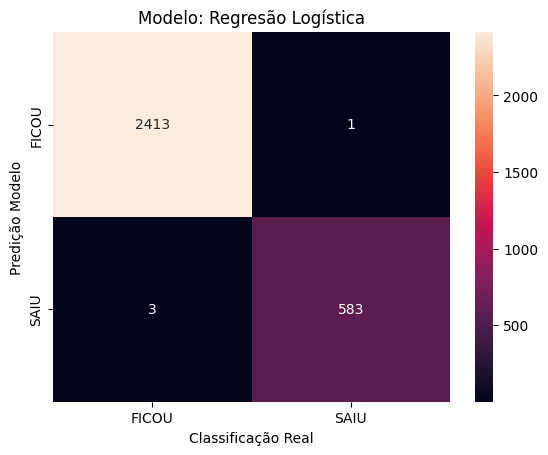

In [102]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

lgr = metrics.confusion_matrix(y_pred, y_test)

sns.heatmap(lgr, annot=True, fmt='.0f', xticklabels = ["FICOU", "SAIU"] , yticklabels = ["FICOU", "SAIU"] )

plt.ylabel('Predição Modelo')
plt.xlabel('Classificação Real')
plt.title('Modelo: Regresão Logística')

In [63]:
# # analisar bem.
# len(list(filter(lambda x: x == 0, y_pred)))

2470

In [95]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=2000)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))



[[2460    3]
 [  10 2305]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
y_pred = pd.DataFrame(y_pred)
y_pred.value_counts()

,count
0,
0,2470
1,2308


Text(0.5, 1.0, 'Modelo: Regresão Logística com Dados Balanceados')

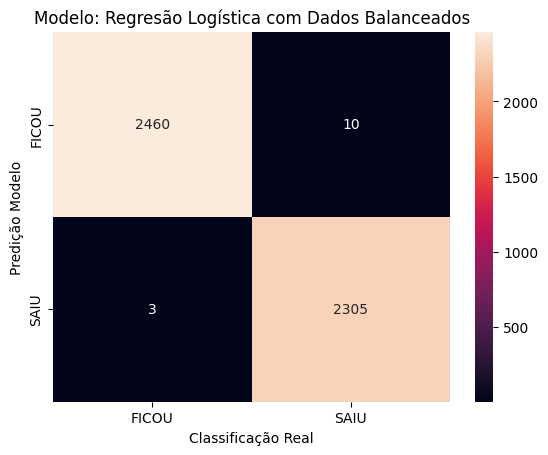

In [98]:
# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# %matplotlib inline
# import matplotlib.pyplot as plt

lgr_balanc = metrics.confusion_matrix(y_pred, y_test)

sns.heatmap(lgr_balanc, annot=True, fmt='.0f', xticklabels = ["FICOU", "SAIU"] , yticklabels = ["FICOU", "SAIU"] )

plt.ylabel('Predição Modelo')
plt.xlabel('Classificação Real')
plt.title('Modelo: Regresão Logística com Dados Balanceados')

In [ ]:
# analisar bem.
len(list(filter(lambda x: x == 0, y_pred)))

2470

In [ ]:
df.head()

,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,42,0.00,1,1,1
1,41,83807.86,1,1,0
2,42,159660.80,3,0,1
3,39,0.00,2,0,0
4,43,125510.82,1,1,0


In [ ]:

# Cálculo da precisão geral
precision_geral = np.trace(confusion_matrix) / np.sum(confusion_matrix)

# Impressão da precisão geral
print("Precisão geral:", precision_geral)

# A precisão mede a proporção de previsões positivas feitas pelo modelo que
# estão corretas. Em outras palavras, ela indica a confiabilidade das previsões
# do modelo.

# Uma alta precisão para uma classe indica que o modelo é confiável na
# identificação de exemplos dessa classe.
# Uma baixa precisão pode indicar que o modelo está confundindo a classe com
# outras classes.

# A precisão é sensível ao desequilíbrio de classes.
# Se uma classe for muito mais frequente que as outras, a precisão geral pode
# ser alta mesmo que o modelo tenha um desempenho ruim na identificação das
# classes menos frequentes.


#==============================================================================
# Recall = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)
#==============================================================================
# O recall é uma métrica importante para avaliar a capacidade do modelo de
# identificar todos os exemplos de uma classe, mesmo que isso signifique que ele
# irá classificar incorretamente alguns exemplos de outras classes.


# Cálculo da acurácia
accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)

# Impressão do resultado
print("Acurácia:", accuracy)

# É importante verificar se a matriz de confusão está correta antes de calcular
# a acurácia.
# A acurácia é uma métrica simples que indica a proporção de exemplos que foram
# classificados corretamente pelo modelo. No entanto, ela pode ser enganosa em
# casos de desbalanceamento de classes, quando uma classe é muito mais frequente
# que as outras.

In [ ]:
# # método de otimização de variáveis preditoras usando Dendograma.
# #  usamos a técnica de Eliminação Recursiva de Variáveis (RFE) para selecionar
# #  as variáveis mais importantes em relação à variável target.
# #  Em seguida, calculamos a matriz de correlação das variáveis selecionadas e
# #  plotamos um dendograma para visualizar a hierarquia de agrupamento.

# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression
# from scipy.cluster.hierarchy import dendrogram, linkage

# # DataFrame
# df = BaseDadosCorr

# # Definir as variáveis preditoras e a variável target
# X = df.drop('Exited', axis=1)
# y = df['Exited']

# # Aplicar RFE para selecionar as variáveis mais importantes
# # Eliminação Recursiva de Variáveis (RFE)
# model = LinearRegression()
# rfe = RFE(model, n_features_to_select=2)
# fit = rfe.fit(X, y)

# # Obter as variáveis selecionadas
# selected_features = X.columns[fit.support_]

# # Calcular a matriz de correlação das variáveis selecionadas
# correlation_matrix = df[selected_features].corr()

# # Usar linkage para criar a hierarquia de agrupamento
# Z = linkage(correlation_matrix, 'ward')

# # Plotar o dendograma
# plt.figure(figsize=(10, 7))
# dendrogram(Z, labels=correlation_matrix.columns)
# plt.title('Dendograma de Correlação')
# plt.xlabel('Variáveis')
# plt.ylabel('Distância')
# plt.show()

In [ ]:
# # scatter plot
# g = sns.PairGrid(BaseDados_corr, vars=['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Complain',
# 'Point Earned', 'IsActiveMember', 'Exited'])
# g.map(plt.scatter, alpha=0.8)
# g.add_legend();

In [ ]:
# # 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Complain',
# # 'Point Earned', 'Geography_Germany', 'Geography_Spain', 'Gender_Male',
# # 'IsActiveMember_1'

# # Importa biblioteca estatística.
# import scipy.stats as stats
# # Performing normaltest
# from scipy.stats import normaltest
# import pylab as p
# # teste de normaliadade para verificar aplicação de testes paramétricos.
# alpha = 0.05
# k2, p = normaltest(BaseDados['CreditScore'])
# #Hipotese nula: Os dados seguem distribuição normal
# #Hipotese alternativa: Os dados não seguem distribuição normal
# if p < alpha:
#     print("A Hipótese Nula pode ser rejeitada")
# else:
#     print("A hipótese nula não pode ser rejeitada")
# print('Valor de p é ', p)
###############################################################################
# Teste mais adedquado para verificar a normalidade é o teste de
# Kolmogorov-Smirnov
###############################################################################
# Conjunto de dados discretos
dados_PAM = BaseDados['CreditScore']

# Realiza o teste de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(dados_PAM, 'norm')

# Imprime o resultado do teste
print('ks_statistic:', ks_statistic)
print('p_value:', p_value)

# O teste de normalidade de Kolmogorov-Smirnov é um teste de hipóteses que testa
# a hipótese nula de que os dados seguem uma distribuição normal.
# O p-valor do teste é a probabilidade de obter uma ks_statistic tão extrema ou
# mais extrema do que a observada, assumindo que a hipótese nula é verdadeira.

# Um p-valor menor que 0,05 indica que há uma diferença significativa entre a CDF
# dos dados observados e a CDF de uma distribuição normal. Nesse caso, a hipótese
# nula é rejeitada e conclui-se que os dados não seguem uma distribuição normal.

# Portanto, a ks_statistic é um indicador da diferença entre a distribuição de
# frequência dos dados observados e a distribuição de frequência esperada de uma
# distribuição normal.
# Um valor alto de ks_statistic indica que há uma diferença significativa entre as
# duas distribuições.

NameError: name 'stats' is not defined

Anotações do CHAT